In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
salary_df=pd.read_csv('/content/Salary_dataset.csv')

In [ ]:
salary_df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [ ]:
salary_df = salary_df.drop('Unnamed: 0', axis=1)
salary_df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [ ]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
salary_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [ ]:
salary_df.nunique()

,0
YearsExperience,28
Salary,30


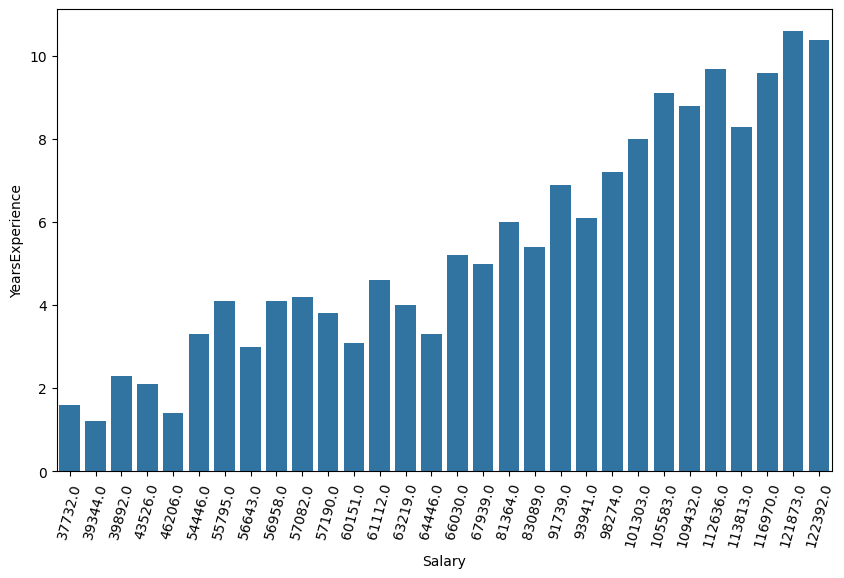

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=75)
sns.barplot(x=salary_df["Salary"], y=salary_df["YearsExperience"]);

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12')])

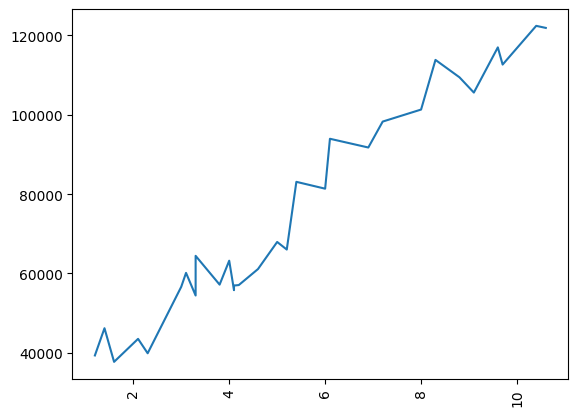

In [ ]:
plt.plot(salary_df.YearsExperience, salary_df.Salary)

plt.xticks(rotation=90)

<Axes: >

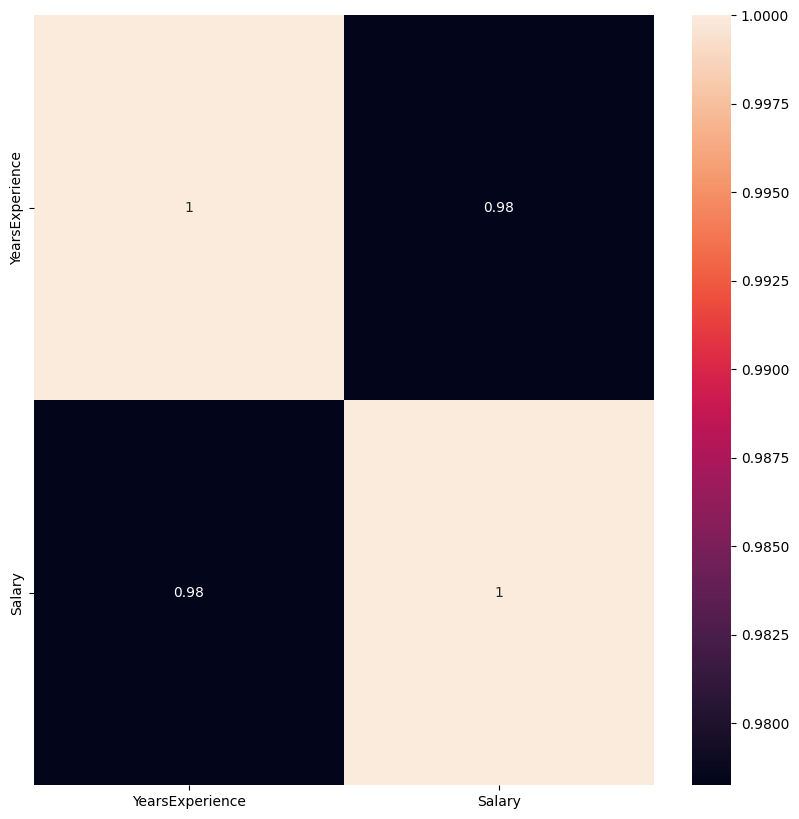

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(salary_df.corr(), annot=True)

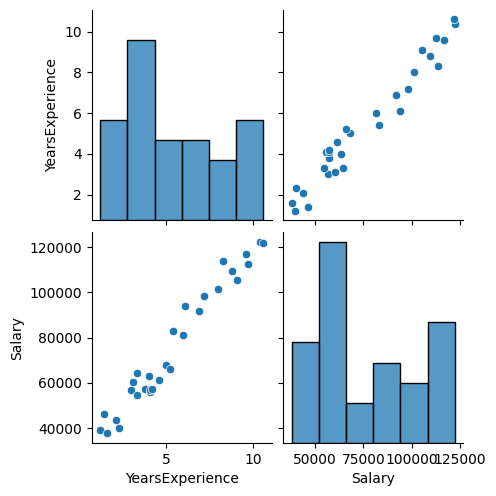

In [ ]:
sns.pairplot(salary_df)

In [ ]:
# splitting feature from label
X=salary_df.drop(['Salary'],axis=1)
y=salary_df['Salary']

In [ ]:
X

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [ ]:
y

,Salary
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0
5,56643.0
6,60151.0
7,54446.0
8,64446.0
9,57190.0


In [ ]:
#splitting into train and test
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6, 1)
(24,)
(6,)


**To train the model, there are several algorithms to employ, these are:**

**LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_lr=lr.predict(X_test)

In [ ]:
lr.predict([[2.1]])

array([44170.21365784])

In [ ]:
pd.DataFrame({
    'y test': y_test,
    'y prediction': y_pred_lr
})

,y test,y prediction
27,112636.0,115791.210113
15,67939.0,71499.278095
23,113813.0,102597.868661
17,83089.0,75268.804224
8,64446.0,55478.792045
9,57190.0,60190.699707


In [ ]:
#To calculate MSE
from sklearn.metrics import mean_squared_error

In [ ]:
mse=mean_squared_error(y_test, y_pred_lr)
print(f'The mean squared error is {mse}')

The mean squared error is 49830096.855908394


In [ ]:
#import numpy as np to calculate root mean squared error
rmse = np.sqrt(mse)
print(f'The root mean squared error is {rmse}')

The root mean squared error is 7059.04362190151


**RANDOM FOREST REGRESSION**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred_rf=rf.predict(X_test)

In [ ]:
rf.predict([[2.1]])

array([42437.4])

In [ ]:
pd.DataFrame({
    'y test': y_test,
    'y prediction': y_pred_rf
})

,y test,y prediction
27,112636.0,113766.470000
15,67939.0,63791.412000
23,113813.0,103378.380000
17,83089.0,72160.080000
8,64446.0,55832.103333
9,57190.0,60594.000833


In [ ]:
mse=mean_squared_error(y_test,y_pred_rf)
print(f'The mean squared error for Random Forest is {mse}')

The mean squared error for Random Forest is 55431578.83446484


In [ ]:
rmse=np.sqrt(mse)
print(f'The root mean square error is {rmse}')

The root mean square error is 7445.238668737547


**DECISION TREE REGRESSION**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_dt=dt.predict(X_test)

In [ ]:
dt.predict([[2.1]])

array([43526.])

In [ ]:
pd.DataFrame({
    'y test':y_test,
    'y prediction': y_pred_dt
})

,y test,y prediction
27,112636.0,116970.0
15,67939.0,66030.0
23,113813.0,101303.0
17,83089.0,66030.0
8,64446.0,54446.0
9,57190.0,63219.0


In [ ]:
mse=mean_squared_error(y_test, y_pred_dt)
print(f'The mean squared error for Decision Tree Regressor is {mse}')

The mean squared error for Decision Tree Regressor is 101047709.83333333


In [ ]:
rmse=np.sqrt(mse)
print(f'The root mean square error is {rmse}')

The root mean square error is 10052.248993799016


**RIDGE REGRESSION**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_reg=Ridge(alpha=1, solver='cholesky')

In [ ]:
ridge_reg.fit(X_train, y_train)

Ridge(alpha=1, solver='cholesky')

In [ ]:
y_pred_ridge=ridge_reg.predict(X_test)

In [ ]:
pd.DataFrame({
    'y pred': y_test,
    'y prediction': y_pred_ridge
})

,y pred,y prediction
27,112636.0,115583.532123
15,67939.0,71512.809522
23,113813.0,102456.082838
17,83089.0,75263.509318
8,64446.0,55572.335389
9,57190.0,60260.710134


In [ ]:
mse=mean_squared_error(y_test, y_pred_ridge)
print(f'The mean squared error is {mse}')

The mean squared error is 49974852.71999642


In [ ]:
rmse=np.sqrt(mse)
print(f'The root mean squared error is {rmse}')

The root mean squared error is 7069.289407005234


In [ ]:
ridge_reg.predict([[2.1]])

array([44320.23600177])

**STOCHASTIC GRADIENT DESCENT (SGD) WITH RIDGE(L2)**

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X_train, y_train)

SGDRegressor()

In [ ]:
y_pred_sgdridge=sgd_reg.predict(X_test)

In [ ]:
sgd_reg.predict([[2.1]])

array([42023.0149847])

In [ ]:
pd.DataFrame({
    'y test':y_test,
    'y_prediction':y_pred_sgdridge
})

,y test,y_prediction
27,112636.0,117592.938708
15,67939.0,70858.906932
23,113813.0,103672.163285
17,83089.0,74836.271338
8,64446.0,53955.108204
9,57190.0,58926.813712


In [ ]:
mse=mean_squared_error(y_test, y_pred_sgd)
print(f'The mean squared error is {mse}')

The mean squared error is 54248625.98795905


In [ ]:
rmse=np.sqrt(mse)
print(f'The root mean squared error is {rmse}')

The root mean squared error is 7365.3666567224645


**LASSO REGRESSION**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
 lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
lasso_reg.predict([[2.1]])

array([44170.25205639])

In [ ]:
y_pred_las=lasso_reg.predict(X_test)

In [ ]:
pd.DataFrame({
    'y test': y_test,
    'y prediction': y_pred_las
})

,y test,y prediction
27,112636.0,115791.156957
15,67939.0,71499.281558
23,113813.0,102597.832370
17,83089.0,75268.802869
8,64446.0,55478.815988
9,57190.0,60190.717626


In [ ]:
mse=mean_squared_error(y_test, y_pred_las)
print(f'The mean squared error for Lasso is {mse}')

The mean squared error for Lasso is 49830130.61850801


In [ ]:
rmse=np.sqrt(mse)
print(f'The root mean squared error is {rmse}')

The root mean squared error is 7059.046013344014


**STOCHASTIC GRADIENT DESCENT REGRESSION(SGD) WITH LASSO(L1)**

In [ ]:
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X_train, y_train)

SGDRegressor(penalty='l1')

****

In [ ]:
 sgd_reg.predict([[2.1]])

array([42023.0149847])

In [ ]:
y_pred_sgdlas=sgd_reg.predict(X_test)

In [ ]:
pd.DataFrame({
    'y test': y_test,
    'y_prediction': y_pred_sgdlas
})

,y test,y_prediction
27,112636.0,117592.938708
15,67939.0,70858.906932
23,113813.0,103672.163285
17,83089.0,74836.271338
8,64446.0,53955.108204
9,57190.0,58926.813712


In [ ]:
mse=mean_squared_error(y_test, y_pred_sgdlas)
print(f'The mean squared error is {mse}')

The mean squared error is 52852755.00395865


In [ ]:
rmse=np.sqrt(mse)
print(f'The mean squared error is {rmse}')

The mean squared error is 7269.990027775736


In [ ]:
pd.DataFrame({
    'y_pred_lr': y_pred_lr,
    'y_pred_rf': y_pred_rf,
    'y_pred_rf': y_pred_dt,
    'y_pred_dt': y_pred_dt,
    'y_pred_ridge': y_pred_ridge,
    'y_pred_sgdridge': y_pred_sgdridge,
    'y_pred_las': y_pred_las,
    'y_pred_sgdlas': y_pred_las
})

,y_pred_lr,y_pred_rf,y_pred_dt,y_pred_ridge,y_pred_sgdridge,y_pred_las,y_pred_sgdlas
0,115791.210113,116970.0,116970.0,115583.532123,117592.938708,115791.156957,115791.156957
1,71499.278095,66030.0,66030.0,71512.809522,70858.906932,71499.281558,71499.281558
2,102597.868661,101303.0,101303.0,102456.082838,103672.163285,102597.832370,102597.832370
3,75268.804224,66030.0,66030.0,75263.509318,74836.271338,75268.802869,75268.802869
4,55478.792045,54446.0,54446.0,55572.335389,53955.108204,55478.815988,55478.815988
5,60190.699707,63219.0,63219.0,60260.710134,58926.813712,60190.717626,60190.717626
